In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dados = pd.DataFrame (
  {
      'medida' : [0.19178, 1.7141, 2.000, 2.6144, 3.2296, 
                  3.5414, 2.33445, 2.1555, 4.21816, 3.9721],
      'resultado': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
  }
)

dados

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,medida,resultado
0,0.19178,0
1,1.71410,0
2,2.00000,0
3,2.61440,0
4,3.22960,0
5,3.54140,1
6,2.33445,1
7,2.15550,1
8,4.21816,1
9,3.97210,1


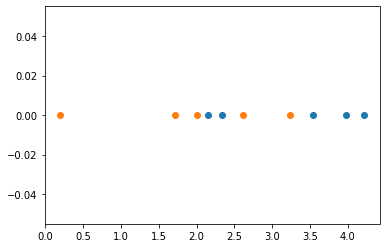

In [ ]:
## Colocando em um gráfico para ver coisas interessantes
plt.scatter(dados.medida[dados.resultado == 1], np.zeros(5))
plt.scatter(dados.medida[dados.resultado == 0], np.zeros(5))

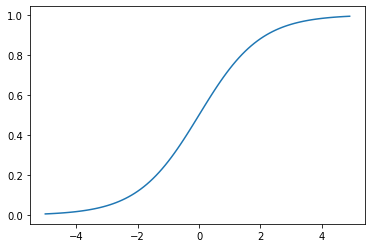

In [ ]:
def sigmoid(x) :
  return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
plt.plot(x, sigmoid(x))

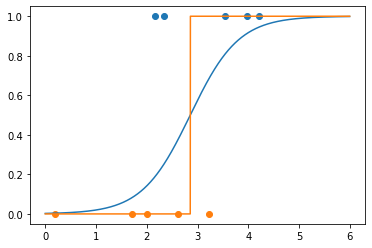

In [4]:
def sigmoid(x) :
  return 1/(1+np.exp(-2.1*x + 6))

def classificador(x, threshold = 0.5):
  return (sigmoid(x) > threshold).astype(np.int)

x = np.arange(0, 6, 0.001)

## Plotando a sigmoid
plt.plot(x, sigmoid(x))

## Plotando o classificador
plt.plot(x, classificador(x))
#plt.plot(x, classificador(x, 0.75))
#plt.plot(x, classificador(x, 0.25))

plt.scatter(dados.medida[dados.resultado == 1], np.ones(5))
plt.scatter(dados.medida[dados.resultado == 0], np.zeros(5))

In [ ]:
## Verificando os resultados no formato de array

print(dados.resultado)
print(classificador(dados.medida))
print(classificador(dados.medida) == dados.resultado)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: resultado, dtype: int64
0    0
1    0
2    0
3    0
4    1
5    1
6    0
7    0
8    1
9    1
Name: medida, dtype: int64
0     True
1     True
2     True
3     True
4    False
5     True
6    False
7    False
8     True
9     True
dtype: bool


In [ ]:
print(classificador(dados.medida, 0.75) == dados.resultado)

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7    False
8     True
9     True
dtype: bool


# Medidas
## Acurácia

In [ ]:
def accuracy(target, prediction):
  return (target == prediction).sum()/len(target)

print(accuracy(dados.resultado, classificador(dados.medida, 0.50)))
print(accuracy(dados.resultado, classificador(dados.medida, 0.75)))

0.7
0.8


In [ ]:
## Exemplo do erro de se utilizar apenas accuracy (com banco de dados desbalanceado)
target = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1])
zeros = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])

accuracy(target, zeros)

0.9230769230769231

## Matriz de Confusão

4 1 2 3


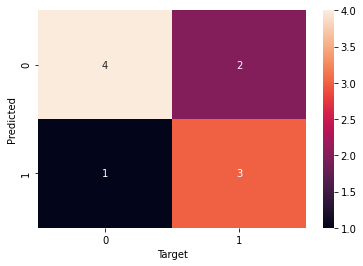

In [ ]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(dados.resultado, classificador(dados.medida))

## True-Negative / False-Positive / False-Negative / True-Positive
tn, fp, fn, tp = matriz.ravel()

print(tn, fp, fn, tp)

## Colocar a transposta da matriz
sns.heatmap(matriz.T, annot=True)
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.show()

## Precision (Precisão)

* Fração de instâncias classificadas como relevantes que são realmente relevantes

In [ ]:
## Os dados que são 1, precisam ser 1
## Caso do câncer

def precision(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp + fp)

precision(dados.resultado, classificador(dados.medida))

0.75

## Recall (Sensibilidade, Revocação)

1. Fração de instâncias relevantes que foram recuperadas
2. Queremos dados completos
3. Os que eram 1, têm que ser retornados

In [ ]:
## Importa as instâncias positivas/Pré filtragem
## Caso da epidemia

def recall(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tp/(tp + fn)

recall(dados.resultado, classificador(dados.medida))

0.6

## Medida F

In [ ]:
## Média harmônica de Recall e Precision

def medida_f(target, prediction):
  rec = recall(target, prediction)
  prec = precision(target, prediction)
  return 2*rec*prec/(rec + prec)

medida_f(dados.resultado, classificador(dados.medida))

0.6666666666666665

## Specificity (Especificidade)

1. Porcentagem das amostras negativas (zero) que foram realmente classificadas como negativas

In [ ]:
## Importa as instâncias negativas
## Caso do gato ou cachorro (specificity com recall)

def specificity(target, prediction):
  matriz = confusion_matrix(target, prediction)
  tn, fp, fn, tp = matriz.ravel()
  return tn/(tn + fp)

specificity(dados.resultado, classificador(dados.medida))

0.8

## Todas as métricas

(0.6666666666666665, 0.75, 0.6, 0.8)


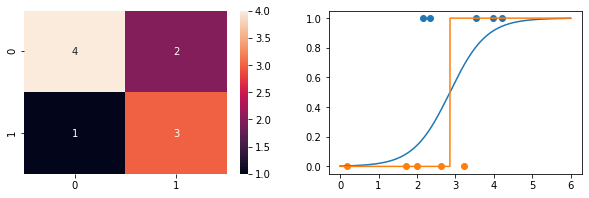

In [ ]:
def all_measures(target, predicted):
  prec = precision(target, predicted)
  rec = recall(target, predicted)
  f_me = medida_f(target, predicted)
  spec = specificity(target, predicted)
  return f_me, prec, rec, spec

THR = 0.5

plt.subplots(ncols=2, nrows=1, figsize=(10, 3))
plt.subplot(1,2,1)

predicted = classificador(dados.medida, THR)
matrix = confusion_matrix(dados.resultado, predicted)
sns.heatmap(matrix.T, annot=True)

print(all_measures(dados.resultado, predicted))

####

plt.subplot(1,2,2)
## Plotando a sigmoid
plt.plot(x, sigmoid(x))

## Plotando o classificador
plt.plot(x, classificador(x, THR))

plt.scatter(dados.medida[dados.resultado == 1], np.ones(5))
plt.scatter(dados.medida[dados.resultado == 0], np.zeros(5))

In [ ]:
target = dados.resultado

#print(list(target))

for i in range(0, 11):
  thr = i/10.0

  predicted_array = classificador(dados.medida, thr)
  f, prec, rec, spe = all_measures(target, predicted_array)
  print("%.1f ==> F_mea: %0.3f, Prec: %0.3f, Rec: %0.3f, Spe: %0.3f %s" % (thr, f, prec, rec, spe, list(predicted_array)))

0.0 ==> F_mea: 0.667, Prec: 0.500, Rec: 1.000, Spe: 0.000 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.1 ==> F_mea: 0.769, Prec: 0.625, Rec: 1.000, Spe: 0.400 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
0.2 ==> F_mea: 0.727, Prec: 0.667, Rec: 0.800, Spe: 0.600 [0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
0.3 ==> F_mea: 0.600, Prec: 0.600, Rec: 0.600, Spe: 0.600 [0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
0.4 ==> F_mea: 0.667, Prec: 0.750, Rec: 0.600, Spe: 0.800 [0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
0.5 ==> F_mea: 0.667, Prec: 0.750, Rec: 0.600, Spe: 0.800 [0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
0.6 ==> F_mea: 0.667, Prec: 0.750, Rec: 0.600, Spe: 0.800 [0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
0.7 ==> F_mea: 0.750, Prec: 1.000, Rec: 0.600, Spe: 1.000 [0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
0.8 ==> F_mea: 0.750, Prec: 1.000, Rec: 0.600, Spe: 1.000 [0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
0.9 ==> F_mea: 0.571, Prec: 1.000, Rec: 0.400, Spe: 1.000 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
1.0 ==> F_mea: nan, Prec: nan, Rec: 0.000, Spe: 1.000 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


Text(0, 0.5, 'Recall')

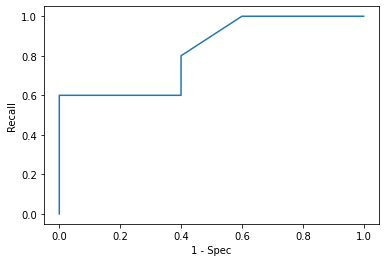

In [ ]:
recall_axis =      [1,  1,  0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.4, 0]
specificity_axis = [0, 0.4, 0.6, 0.6, 0.8, 0.8, 0.8,   1,   1,   1, 1]

## ROC Curve
plt.plot(1 - np.array(specificity_axis), recall_axis)

plt.xlabel("1 - Spec")
plt.ylabel("Recall")